In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, MultipleLocator, ScalarFormatter
from matplotlib.path import Path
from matplotlib.patches import BoxStyle
import seaborn as sns
#import random
#import math
#import time
#from sklearn.linear_model import LinearRegression, BayesianRidge
#from sklearn.model_selection import RandomizedSearchCV, train_test_split
#from sklearn.svm import SVR
#from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime

In [2]:
# Read the data from Johns Hopkins
conf_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
confirmed_df = pd.read_csv(conf_url)

death_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
deaths_df = pd.read_csv(death_url)

In [3]:
# Population per country 2018 (data from https://www.nordicstatistics.org/population/)

swe_pop = 10120242
nor_pop = 5295619
den_pop = 5781190

In [4]:
# Extract the Scandinavian countries and combine to a dataframe
scandic = ["Sweden", "Norway", "Denmark"]
scandic_conf_df = confirmed_df[confirmed_df["Country/Region"].isin(scandic)]
scandic_deaths_df = deaths_df[deaths_df["Country/Region"].isin(scandic)]

In [5]:
# Drop not used columns
scandic_conf_df = scandic_conf_df.drop(["Province/State","Lat", "Long"], axis=1).groupby("Country/Region").sum()
scandic_deaths_df = scandic_deaths_df.drop(["Province/State","Lat", "Long"], axis=1).groupby("Country/Region").sum()

In [6]:
scandic_conf_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Denmark,0,0,0,0,0,0,0,0,0,0,...,13238,13262,13293,13325,13374,13374,13377,13466,13506,13554
Norway,0,0,0,0,0,0,0,0,0,0,...,8984,9001,9011,9015,9025,9028,9028,9034,9053,9059
Sweden,0,0,0,0,0,0,0,0,0,1,...,75826,76001,76492,76877,77281,77281,77281,78048,78166,78504


In [7]:
scandic_deaths_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Denmark,0,0,0,0,0,0,0,0,0,0,...,610,610,610,610,611,611,611,611,611,611
Norway,0,0,0,0,0,0,0,0,0,0,...,253,253,253,254,255,255,255,255,255,255
Sweden,0,0,0,0,0,0,0,0,0,0,...,5536,5545,5572,5593,5619,5619,5619,5639,5646,5667


In [8]:
# Create lists from the dataframe to use in creation of long dataframe
dates = scandic_conf_df.keys()

mortality_rate_swe = []
mortality_rate_nor = []
mortality_rate_den = []

sweden_cases = []
sweden_deaths = []

norway_cases = []
norway_deaths = []

denmark_cases = []
denmark_deaths = []

uk_cases = []
uk_deaths = []

for i in dates:
    sweden_sum = scandic_conf_df[i]["Sweden"]
    norway_sum = scandic_conf_df[i]["Norway"]
    denmark_sum = scandic_conf_df[i]["Denmark"]
    #death_sum = deaths[i].sum()
    sweden_death_sum = scandic_deaths_df[i]["Sweden"]
    norway_death_sum = scandic_deaths_df[i]["Norway"]
    denmark_death_sum = scandic_deaths_df[i]["Denmark"]
                                               
    sweden_cases.append(sweden_sum)
    norway_cases.append(norway_sum)
    denmark_cases.append(denmark_sum)

    #total_deaths.append(death_sum)
    sweden_deaths.append(sweden_death_sum)
    norway_deaths.append(norway_death_sum)
    denmark_deaths.append(denmark_death_sum)
    
    mortality_rate_swe.append(sweden_death_sum/sweden_sum)
    mortality_rate_nor.append(norway_death_sum/norway_sum)
    mortality_rate_den.append(denmark_death_sum/denmark_sum)

<ipython-input-8-20d66d116caa>:38: RuntimeWarning: invalid value encountered in long_scalars
  mortality_rate_swe.append(sweden_death_sum/sweden_sum)
<ipython-input-8-20d66d116caa>:39: RuntimeWarning: invalid value encountered in long_scalars
  mortality_rate_nor.append(norway_death_sum/norway_sum)
<ipython-input-8-20d66d116caa>:40: RuntimeWarning: invalid value encountered in long_scalars
  mortality_rate_den.append(denmark_death_sum/denmark_sum)


In [9]:
print(len(scandic_deaths_df.keys()))
print(len(mortality_rate_swe))
print(len(mortality_rate_nor))
print(len(mortality_rate_den))

183
183
183
183


In [10]:
mortality_rate = pd.DataFrame({"Date": scandic_deaths_df.keys(),"Sweden": mortality_rate_swe, "Norway": mortality_rate_nor, "Denmark": mortality_rate_den})
mortality_rate["Date"] = pd.to_datetime(mortality_rate["Date"])
mortality_rate.set_index("Date", inplace=True)
mortality_rate.tail()

,Sweden,Norway,Denmark
Date,,,
2020-07-18,0.072709,0.028245,0.045686
2020-07-19,0.072709,0.028245,0.045675
2020-07-20,0.072250,0.028227,0.045374
2020-07-21,0.072231,0.028167,0.045239
2020-07-22,0.072187,0.028149,0.045079


In [11]:
# Make dataframe that starts from a value of confirmed cases

#above5 S: 36, N: 37, D: 41
#above100 S: 44, N: 45, D: 48

s5 = 36
s100 = 44
n5 = 37
n100 = 44
d5 = 41
d100 = 48

scandi_outbreak = pd.DataFrame({"Sweden": sweden_cases[s5:], "Norway": norway_cases[n5:] + (len(sweden_cases[s5:]) - len(norway_cases[n5:])) * [None],
                                "Denmark": denmark_cases[d5:] + (len(sweden_cases[s5:]) - len(denmark_cases[d5:])) * [None],})
scandi_outbreak.head()

,Sweden,Norway,Denmark
0,7,6.0,6.0
1,7,15.0,11.0
2,12,19.0,11.0
3,14,25.0,24.0
4,15,32.0,24.0


In [12]:
# Rearrange the confirmed dataframe to long format with date as index
d = {"Date": scandic_conf_df.keys(), "Sweden": sweden_cases, "Norway": norway_cases, "Denmark": denmark_cases}
scandic_df = pd.DataFrame(data=d)
scandic_df = scandic_df.melt(id_vars=["Date"], var_name="Country", value_name="Confirmed")
scandic_df["Date"] = pd.to_datetime(scandic_df["Date"], format="%m/%d/%y")
scandic_df.set_index("Date", inplace=True)
scandic_df["2020-03-25":]

,Country,Confirmed
Date,,
2020-03-25,Sweden,2526
2020-03-26,Sweden,2840
2020-03-27,Sweden,3069
2020-03-28,Sweden,3447
2020-03-29,Sweden,3700
...,...,...
2020-07-18,Denmark,13374
2020-07-19,Denmark,13377
2020-07-20,Denmark,13466


In [13]:
# Rearrange the deaths dataframe to long format with date as index
d = {"Date": scandic_deaths_df.keys(), "Sweden": sweden_deaths, "Norway": norway_deaths, "Denmark": denmark_deaths}
scandic_deaths_df = pd.DataFrame(data=d)
scandic_deaths_df = scandic_deaths_df.melt(id_vars=["Date"], var_name="Country", value_name="Deaths")
scandic_deaths_df["Date"] = pd.to_datetime(scandic_deaths_df["Date"])
scandic_deaths_df.set_index("Date", inplace=True)

# Calculate deaths per capita (per mille)
country_normalize = {"Sweden": swe_pop, "Norway": nor_pop, "Denmark": den_pop}
scandic_deaths_df["Pop"] = [country_normalize[x] for x in scandic_deaths_df["Country"]]
scandic_deaths_df["Deaths per capita"] = (scandic_deaths_df["Deaths"] / scandic_deaths_df["Pop"]) * 1000
scandic_deaths_df["Deaths per 100k"] = (scandic_deaths_df["Deaths"] / scandic_deaths_df["Pop"]) * 100000
scandic_deaths_df.drop("Pop", axis=1, inplace=True)

scandic_deaths_df["2020-04-01":]

,Country,Deaths,Deaths per capita,Deaths per 100k
Date,,,,
2020-04-01,Sweden,239,0.023616,2.361604
2020-04-02,Sweden,308,0.030434,3.043405
2020-04-03,Sweden,358,0.035375,3.537465
2020-04-04,Sweden,373,0.036857,3.685683
2020-04-05,Sweden,401,0.039624,3.962356
...,...,...,...,...
2020-07-18,Denmark,611,0.105688,10.568758
2020-07-19,Denmark,611,0.105688,10.568758
2020-07-20,Denmark,611,0.105688,10.568758


In [14]:
scandic_deaths_df["2020-03-29":].tail(20)

,Country,Deaths,Deaths per capita,Deaths per 100k
Date,,,,
2020-07-03,Denmark,606,0.104823,10.482271
2020-07-04,Denmark,606,0.104823,10.482271
2020-07-05,Denmark,606,0.104823,10.482271
2020-07-06,Denmark,607,0.104996,10.499568
2020-07-07,Denmark,609,0.105342,10.534163
2020-07-08,Denmark,609,0.105342,10.534163
2020-07-09,Denmark,609,0.105342,10.534163
2020-07-10,Denmark,609,0.105342,10.534163
2020-07-11,Denmark,609,0.105342,10.534163


In [15]:
# Calculate the daily increase in cases and deaths and add them to the dataframes
diff_list = []
diff_death = []
rolling_7 = []
rolling_30 = []
for c in scandic_df["Country"].unique():
    diff_list.extend(scandic_df[scandic_df["Country"] == c]["Confirmed"].diff().values)
    diff_death.extend(scandic_deaths_df[scandic_deaths_df["Country"] == c]["Deaths"].diff().values)

len(diff_list)
scandic_df["Increase"] = diff_list
scandic_deaths_df["Increase"] = diff_death

for c in scandic_deaths_df["Country"].unique():
    rolling_7.extend(scandic_deaths_df[scandic_deaths_df["Country"] == c]["Increase"].rolling(7).mean())
    rolling_30.extend(scandic_deaths_df[scandic_deaths_df["Country"] == c]["Increase"].rolling(30).mean())
    
scandic_deaths_df["Rolling7"] = rolling_7
scandic_deaths_df["Rolling30"] = rolling_30

In [16]:
scandic_deaths_df["2020-03-01":].head(20)

,Country,Deaths,Deaths per capita,Deaths per 100k,Increase,Rolling7,Rolling30
Date,,,,,,,
2020-03-01,Sweden,0,0.000000,0.000000,0.0,0.000000,0.000000
2020-03-02,Sweden,0,0.000000,0.000000,0.0,0.000000,0.000000
2020-03-03,Sweden,0,0.000000,0.000000,0.0,0.000000,0.000000
2020-03-04,Sweden,0,0.000000,0.000000,0.0,0.000000,0.000000
2020-03-05,Sweden,0,0.000000,0.000000,0.0,0.000000,0.000000
2020-03-06,Sweden,0,0.000000,0.000000,0.0,0.000000,0.000000
2020-03-07,Sweden,0,0.000000,0.000000,0.0,0.000000,0.000000
2020-03-08,Sweden,0,0.000000,0.000000,0.0,0.000000,0.000000
2020-03-09,Sweden,0,0.000000,0.000000,0.0,0.000000,0.000000


In [17]:
mean_list = []
for c in scandic_df["Country"].unique():
    mean_list.extend(scandic_df[scandic_df["Country"] == c]["Confirmed"].rolling(7).mean())

print(len(mean_list))
scandic_df["Mean7"] = mean_list

scandic_df["2020-04-05":]

549


,Country,Confirmed,Increase,Mean7
Date,,,,
2020-04-05,Sweden,6830,387.0,5483.142857
2020-04-06,Sweden,7206,376.0,5937.142857
2020-04-07,Sweden,7693,487.0,6402.571429
2020-04-08,Sweden,8419,726.0,6898.571429
2020-04-09,Sweden,9141,722.0,7409.000000
...,...,...,...,...
2020-07-18,Denmark,13374,0.0,13287.571429
2020-07-19,Denmark,13377,3.0,13320.428571
2020-07-20,Denmark,13466,89.0,13353.000000


In [18]:
class ExtendedTextBox(BoxStyle._Base):
    """
    An Extended Text Box that expands to the axes limits 
                        if set in the middle of the axes
    """

    def __init__(self, pad=0.3, width=500.):
        """
        width: 
            width of the textbox. 
            Use `ax.get_window_extent().width` 
                   to get the width of the axes.
        pad: 
            amount of padding (in vertical direction only)
        """
        self.width=width
        self.pad = pad
        super(ExtendedTextBox, self).__init__()

    def transmute(self, x0, y0, width, height, mutation_size):
        """
        x0 and y0 are the lower left corner of original text box
        They are set automatically by matplotlib
        """
        # padding
        pad = mutation_size * self.pad

        # we add the padding only to the box height
        height = height + 2.*pad
        # boundary of the padded box
        y0 = y0 - pad
        y1 = y0 + height
        _x0 = x0
        x0 = _x0 +width /2. - self.width/2.
        x1 = _x0 +width /2. + self.width/2.

        cp = [(x0, y0),
              (x1, y0), (x1, y1), (x0, y1),
              (x0, y0)]

        com = [Path.MOVETO,
               Path.LINETO, Path.LINETO, Path.LINETO,
               Path.CLOSEPOLY]

        path = Path(cp, com)

        return path

In [19]:
# Set date intervals for plots

from_date = "2020-02-25"
to_date = ""
if to_date == "":
    to_date = str(scandic_df.index[-1].date())
    
# Set Seaborn style
sns.set_style("whitegrid", {"axes.facecolor": "1.0", "grid.color": ".95", "grid.linestyle": "--"})

# Set line width
l_w = 3

# Calculate number of countries in dataframe
num_countries = len(scandic_df["Country"].unique())

# register the custom textbox style
BoxStyle._style_list["ext"] = ExtendedTextBox

In [20]:
# Old textbox
"""
# Create and display infotext
textstr = '\n'.join((
    "ci = standard deviation",
    f"Latest data: {scandic_df.index[-1].date()}",
    "Source: CSSE at Johns Hopkins University"))
props = dict(boxstyle='round', facecolor='salmon', alpha=0.5)
ax.text(0.05, 0.2, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
"""

'\n# Create and display infotext\ntextstr = \'\n\'.join((\n    "ci = standard deviation",\n    f"Latest data: {scandic_df.index[-1].date()}",\n    "Source: CSSE at Johns Hopkins University"))\nprops = dict(boxstyle=\'round\', facecolor=\'salmon\', alpha=0.5)\nax.text(0.05, 0.2, textstr, transform=ax.transAxes, fontsize=14,\n        verticalalignment=\'top\', bbox=props)\n'

In [21]:
scandic_df[scandic_df["Country"] == "Sweden"][from_date:to_date].shape

(149, 4)

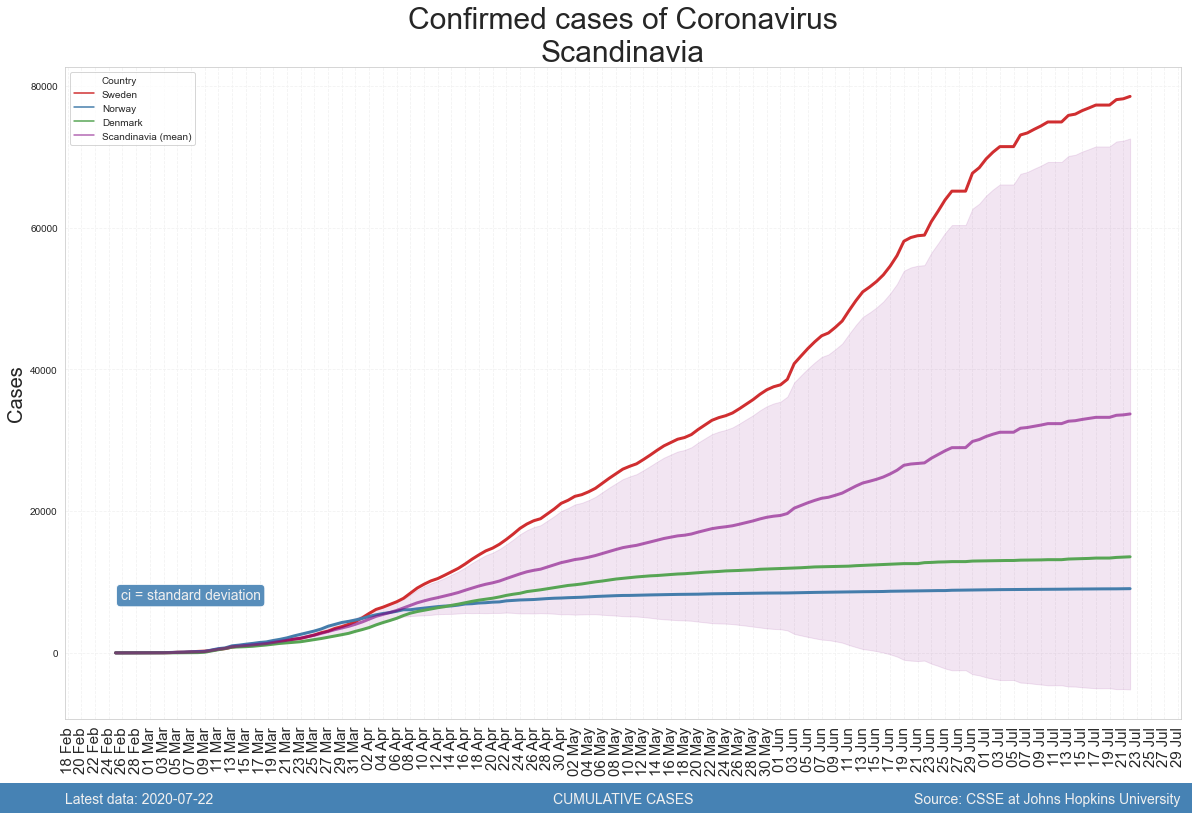

In [22]:
# Plot confirmed cases
fig, ax = plt.subplots(figsize=(20,12))

# Plot per country
sns.lineplot(x=scandic_df[from_date:to_date].index, y="Confirmed", data=scandic_df[from_date:to_date], palette=sns.color_palette("Set1", n_colors=num_countries, desat=.8), hue="Country")

# Plot Sweden rolling mean
#sns.lineplot(x=scandic_df[scandic_df["Country"] == "Sweden"][from_date:to_date].index, y="Mean7", data=scandic_df[scandic_df["Country"] == "Sweden"][from_date:to_date], color="salmon", alpha=.6)

# Plot Scandinavian mean
sns.lineplot(x=scandic_df[from_date:to_date].index, y="Confirmed", data=scandic_df[from_date:to_date], color="purple", label="Scandinavia (mean)", alpha=.6, ci="sd")



# Set xticks location and format
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=range(0,7,2)))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'));


#ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'));

# Format confidence interval
ax.get_children()[0].set_alpha(.1)

# Set the linewidth
for l in range(len(ax.lines)):
    ax.lines[l].set_linewidth(l_w)
    #print(l, ax.lines[l].get_color())

# Create and display infotext
textstr = "ci = standard deviation"
# bbcol = ax.lines[7].get_color()
props = dict(boxstyle='round', facecolor="steelblue", alpha=.9)
ax.text(0.05, 0.2, textstr, transform=ax.transAxes, fontsize=14,
        color="#f0f0f0", verticalalignment='top', bbox=props)

# Set title and axis parameters
plt.title('Confirmed cases of Coronavirus\nScandinavia', size=30)

#plt.xlabel('Date', size=20)
ax.xaxis.label.set_visible(False)
plt.ylabel('Cases', size=20)

# Format xticks
plt.xticks(rotation=90, size=15)


# The signature bar
#str1 = f"Latest data: {scandic_df.index[-1].date()}. Fetched at {datetime.datetime.utcnow():%Y-%m-%d %H:%M} UTZ"
str1 = f"Latest data: {scandic_df.index[-1].date()}"
str2 = "Source: CSSE at Johns Hopkins University"
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]-ax.get_ylim()[1]/7,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1])

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]-ax.get_ylim()[1]/7,
                    s = "CUMULATIVE CASES", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]-ax.get_ylim()[1]/7,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")


# Save as jpg and show plot
fname = str(datetime.date.today()) + "_scandinavia_conf" + ".png"
plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight")
plt.show()

(-709.8653358208599, 2451.8653358208594)


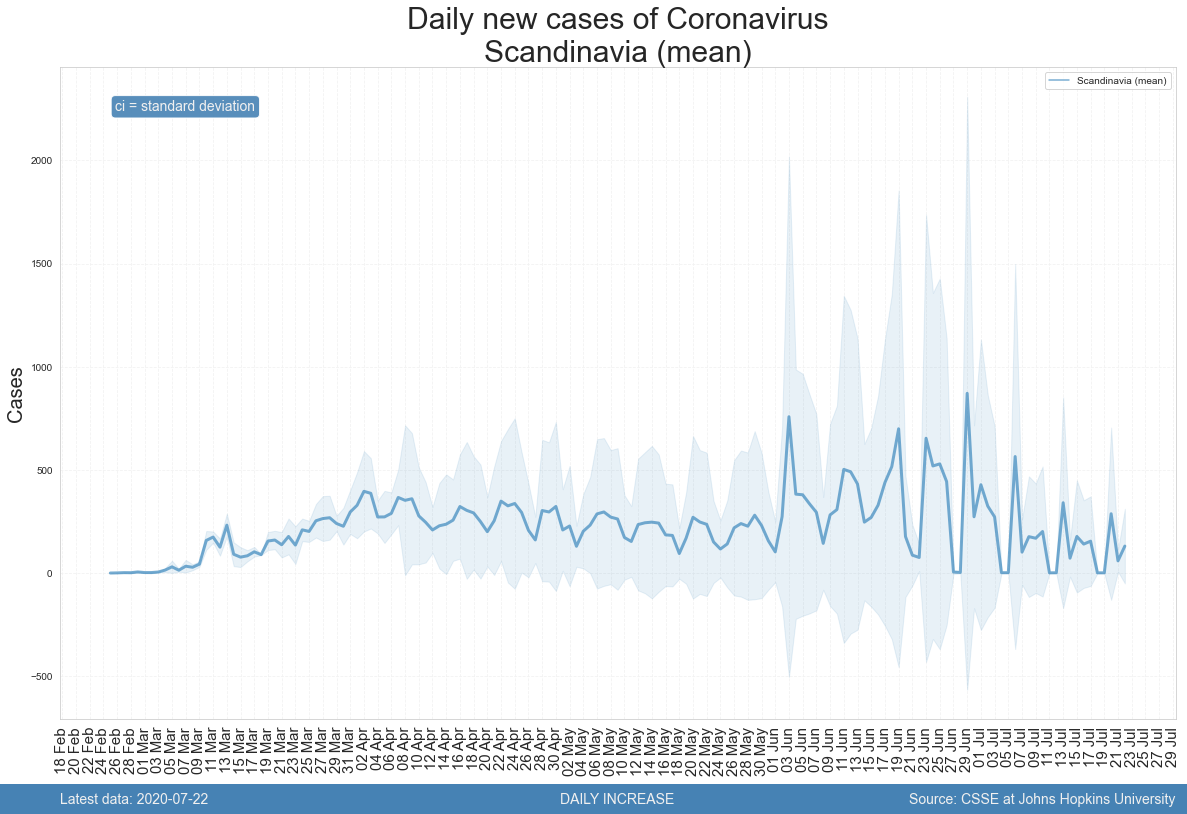

In [23]:
# Plot daily new cases
fig, ax = plt.subplots(figsize=(20,12))

# Plot per country
#sns.lineplot(x=scandic_df[from_date:].index, y="Increase", data=scandic_df[from_date:], palette=sns.color_palette("Set1", n_colors=num_countries, desat=.8), hue="Country")

# Plot Scandinavian mean
sns.lineplot(x=scandic_df[from_date:].index, y="Increase", data=scandic_df[from_date:], label="Scandinavia (mean)", alpha=.6, ci="sd")

# Set xticks location and format
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'));

# Format confidence interval
ax.get_children()[0].set_alpha(.1)

# Set the linewidth
for l in range(len(ax.lines)):
    ax.lines[l].set_linewidth(l_w)

# Create and display infotext
textstr = "ci = standard deviation"
props = dict(boxstyle='round', facecolor='steelblue', alpha=.9)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        color="#f0f0f0",verticalalignment='top', bbox=props)

# Set title and axis parameters
plt.title('Daily new cases of Coronavirus\nScandinavia (mean)', size=30)

#plt.xlabel('Date', size=20)
ax.xaxis.label.set_visible(False)
plt.ylabel('Cases', size=20)

# Format xticks
plt.xticks(rotation=90, size=15)

# The signature bar
str1 = f"Latest data: {scandic_df.index[-1].date()}"
str2 = "Source: CSSE at Johns Hopkins University"
print(ax.get_ylim())
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]-ax.get_ylim()[1]/6,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1])

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]-ax.get_ylim()[1]/6,
                    s = "DAILY INCREASE", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]-ax.get_ylim()[1]/6,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")

# Save as jpg and show plot
fname = str(datetime.date.today()) + "_scandinavia_new_daily" + ".png"
plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight")
plt.show()

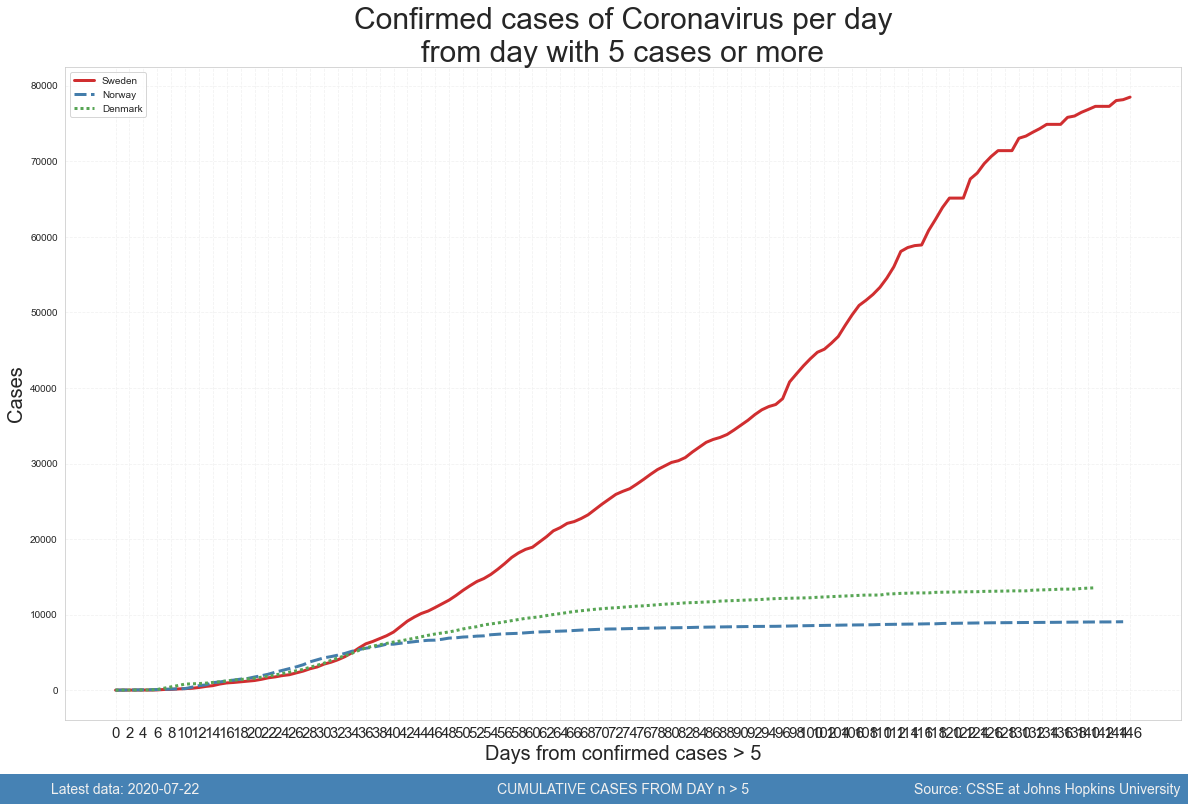

In [24]:
# Plot confirmed cases from day with X cases
fig, ax = plt.subplots(figsize=(20,12))
sns.lineplot(data=scandi_outbreak, palette=sns.color_palette("Set1", n_colors=num_countries, desat=.8))

# Set title and axis parameters
plt.title('Confirmed cases of Coronavirus per day\nfrom day with 5 cases or more', size=30)

plt.xlabel('Days from confirmed cases > 5', size=20)
plt.ylabel('Cases', size=20)

# Format xticks
plt.xticks(range(0, len(scandi_outbreak), 2), size=15)

# Set the linewidth
for l in range(len(ax.lines)):
    ax.lines[l].set_linewidth(l_w)

# Position legend
plt.legend(loc="upper left")

# The signature bar
str1 = f"Latest data: {scandic_df.index[-1].date()}"
str2 = "Source: CSSE at Johns Hopkins University"
signature = ax.text(x = ax.get_xlim()[0]-2, y = ax.get_ylim()[0]*3.5,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_window_extent().width*2)

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]*3.5,
                    s = "CUMULATIVE CASES FROM DAY n > 5", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]*3.5,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")

# Save as jpg and show plot
fname = str(datetime.date.today()) + "_scandinavia_conf_outbreak" + ".png"
#plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight")
plt.show()

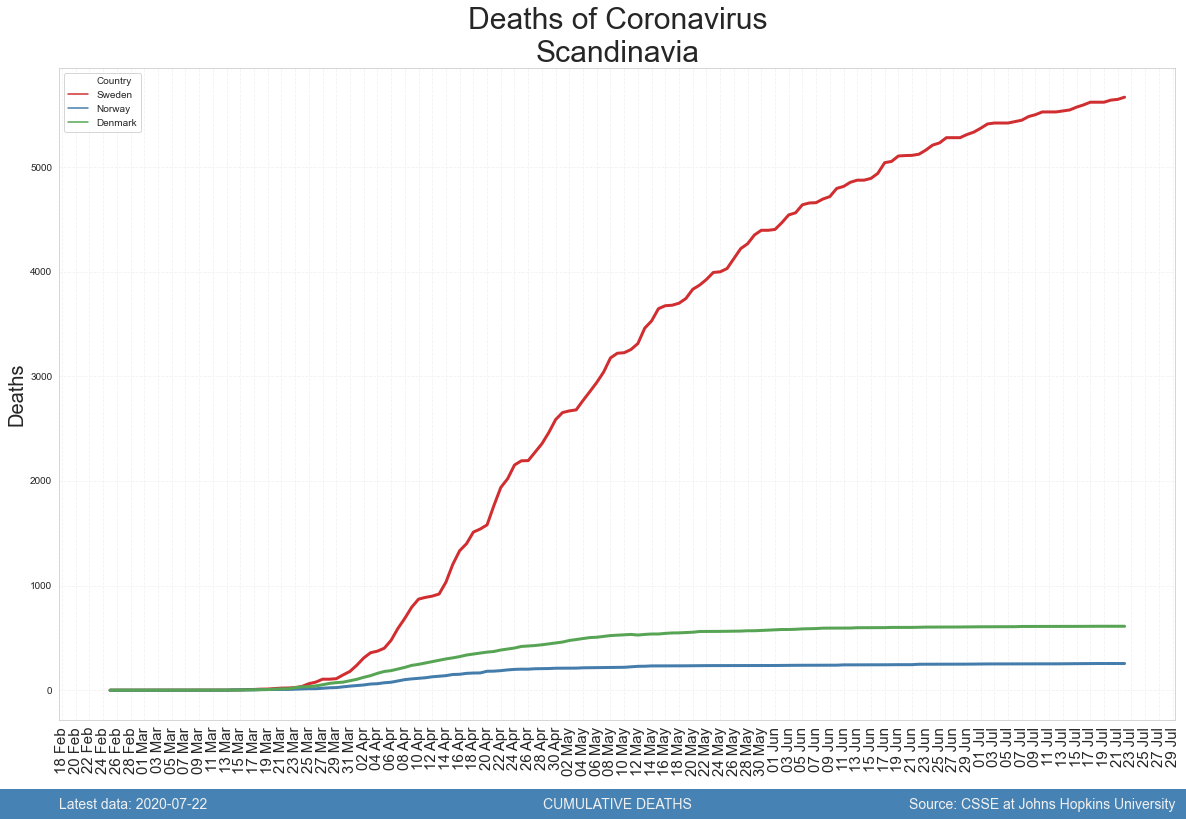

In [25]:
# Plot deaths
fig, ax = plt.subplots(figsize=(20,12))
textstr = ""

# Plot per country
sns.lineplot(x=scandic_deaths_df[from_date:to_date].index, y="Deaths", data=scandic_deaths_df[from_date:to_date], palette=sns.color_palette("Set1", n_colors=num_countries, desat=.8), hue="Country")

# Plot mean if set to true
plot_mean = False
if plot_mean:
    # Plot Scandinavian mean
    sns.lineplot(x=scandic_deaths_df[from_date:to_date].index, y="Deaths", data=scandic_deaths_df[from_date:to_date], color="purple", label="Scandinavia (mean)", alpha=.6, ci="sd")

    # Format confidence interval
    ax.get_children()[0].set_alpha(.1)
    
    # Create and display infotext
    textstr = "ci = standard deviation"
    props = dict(boxstyle='round', facecolor='steelblue', alpha=.9)
    ax.text(0.05, 0.2, textstr, transform=ax.transAxes, fontsize=14,
            color="#f0f0f0", verticalalignment='top', bbox=props)

# Set xticks location and format
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'));

# Set the linewidth
for l in range(len(ax.lines)):
    ax.lines[l].set_linewidth(l_w)



# Set title and axis parameters
plt.title('Deaths of Coronavirus\nScandinavia', size=30)


#plt.xlabel('Date', size=20)
ax.xaxis.label.set_visible(False)
plt.ylabel('Deaths', size=20)

# Format xticks
plt.xticks(rotation=90, size=15)

# The signature bar
str1 = f"Latest data: {scandic_df.index[-1].date()}"
str2 = "Source: CSSE at Johns Hopkins University"
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]*4,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1])

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]*4,
                    s = "CUMULATIVE DEATHS", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]*4,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")

# Save as jpg and show plot
fname = str(datetime.date.today()) + "_scandinavia_deaths" + ".png"
plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight")
plt.show()

Sweden     0.083916
Norway     0.022156
Denmark    0.040668
dtype: float64


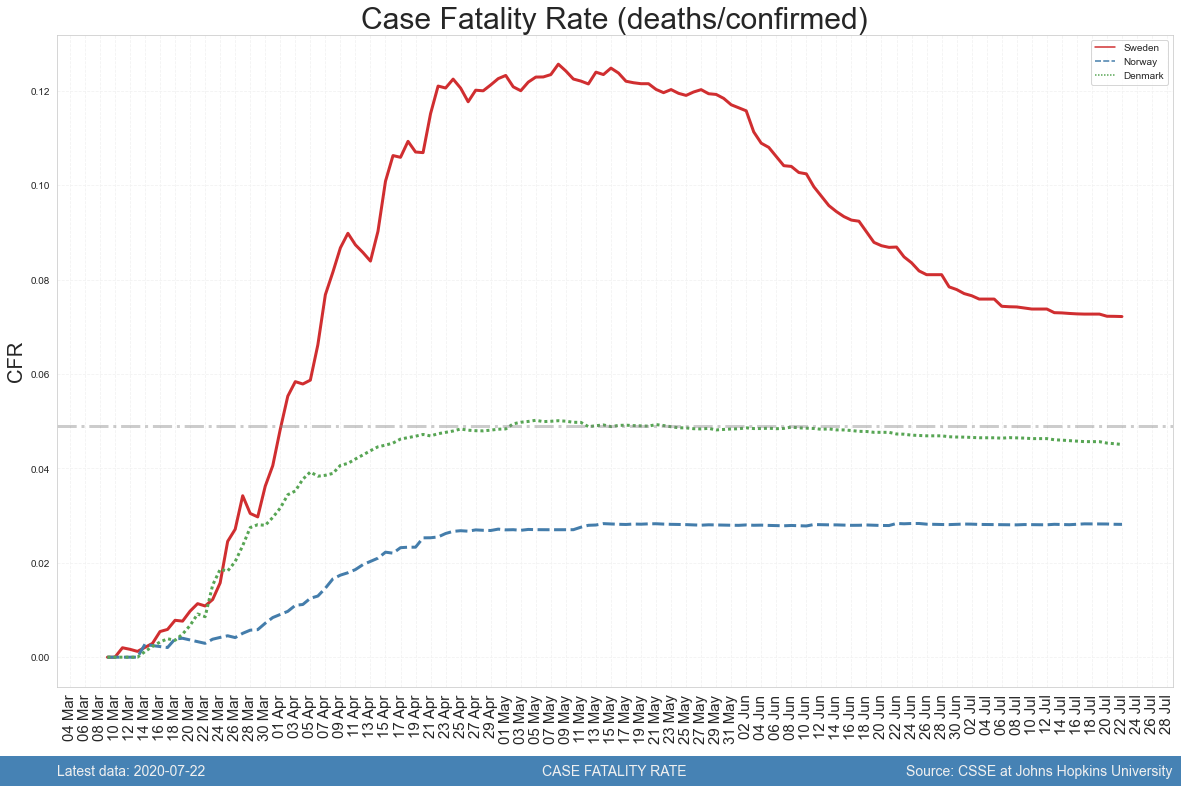

In [26]:
## Den här är letalitet (case fatality rate) och inte mortalitet (mortality).
## CFR är andelen av insjuknade som dör medans mortalitet är andel av populationen

# Plot Case Fatality Rate
fig, ax = plt.subplots(figsize=(20,12))

f_d = 47
genomsnitt = np.mean(mortality_rate[["Sweden", "Norway", "Denmark"]][f_d:])
print(genomsnitt)
sns.lineplot(data=mortality_rate[f_d:], palette=sns.color_palette("Set1", n_colors=num_countries, desat=.8))
#sns.lmplot(x=scandic_deaths_df.index.unique()[f_d:], y=mortality_rate_swe[f_d:])
ax.axhline(genomsnitt.mean(), linestyle="-.", color="grey", alpha=.4)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=range(0,7)))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))

#ax.lines[0].set_linestyle("--")
#ax.lines[0].set_alpha(.5)

# Set the linewidth
for l in range(len(ax.lines)):
    ax.lines[l].set_linewidth(l_w)

# Format x-ticks
plt.xticks(rotation=90, size=15)

# Set title and axis parameters
plt.title("Case Fatality Rate (deaths/confirmed)", size=30)
#plt.xlabel("Date", size=20)
ax.xaxis.label.set_visible(False)
plt.ylabel("CFR", size=20)

# The signature bar
str1 = f"Latest data: {scandic_df.index[-1].date()}"
str2 = "Source: CSSE at Johns Hopkins University"
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]*4,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1])

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]*4,
                    s = "CASE FATALITY RATE", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]*4,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")

# Show plot
plt.show()

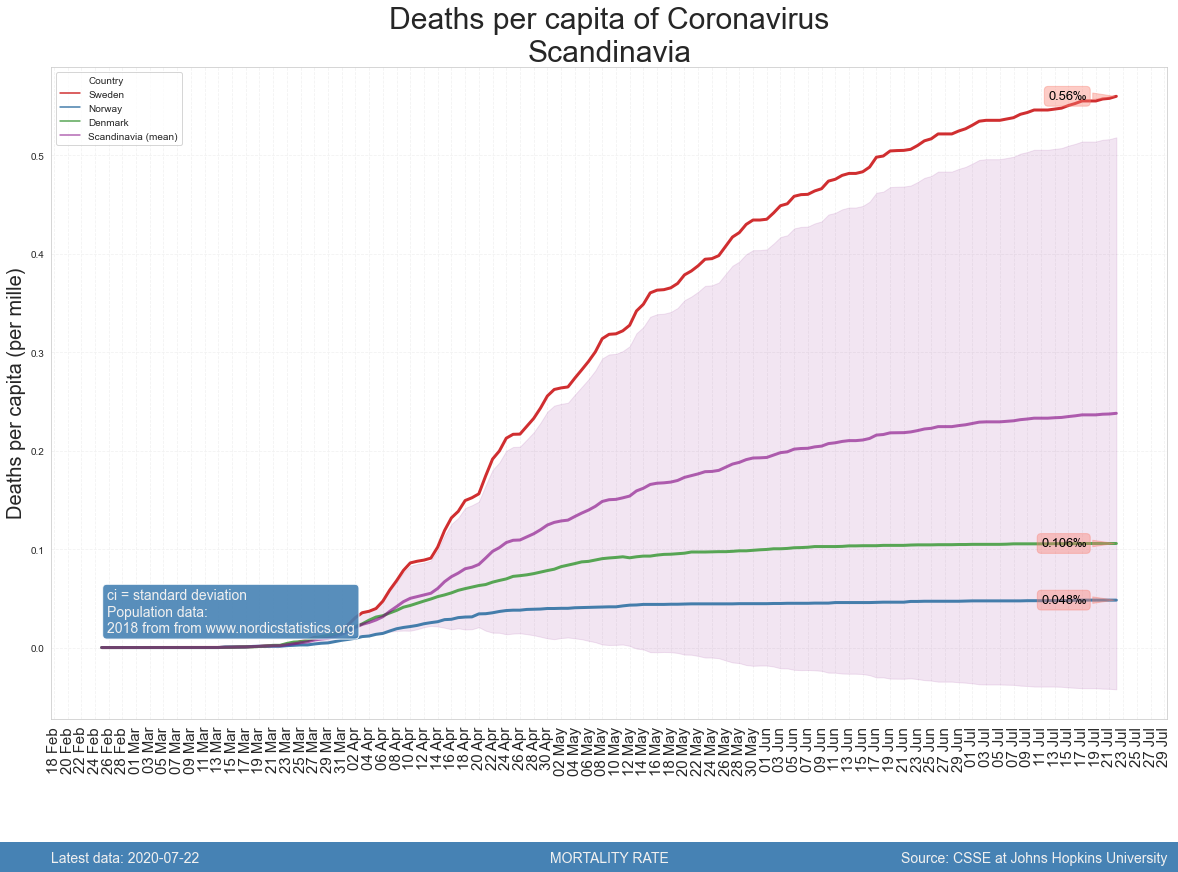

In [27]:
## Denna är mortalitet

# Plot deaths per capita
fig, ax = plt.subplots(figsize=(20,12))
textstr = ""

# Plot per country
sns.lineplot(x=scandic_deaths_df[from_date:to_date].index, y="Deaths per capita", data=scandic_deaths_df[from_date:to_date], palette=sns.color_palette("Set1", n_colors=num_countries, desat=.8), hue="Country")

# Plot mean if set to true
plot_mean = True
if plot_mean:
    # Plot Scandinavian mean
    sns.lineplot(x=scandic_deaths_df[from_date:to_date].index, y="Deaths per capita", data=scandic_deaths_df[from_date:to_date], color="purple", label="Scandinavia (mean)", alpha=.6, ci="sd")

    # Format confidence interval
    ax.get_children()[0].set_alpha(.1)
    textstr = "ci = standard deviation\n"

# Set xticks location and format
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'));

# Create and display infotext
textstr = textstr + "Population data:\n2018 from from www.nordicstatistics.org"
props = dict(boxstyle='round', facecolor='steelblue', alpha=.9)
ax.text(0.05, 0.2, textstr, transform=ax.transAxes, fontsize=14,
        color="#f0f0f0", verticalalignment='top', bbox=props)

# Set title and axis parameters
plt.title("Deaths per capita of Coronavirus\nScandinavia", size=30)

#plt.xlabel("Date", size=20)
ax.xaxis.label.set_visible(False)
plt.ylabel("Deaths per capita (per mille)", size=20)

# Set the linewidth
for l in range(len(ax.lines)):
    ax.lines[l].set_linewidth(l_w)

# Format xticks
plt.xticks(rotation=90, size=15)

# Find last values
swe_last_dpc = scandic_deaths_df[scandic_deaths_df["Country"] == "Sweden"]["Deaths per capita"][-1]
nor_last_dpc = scandic_deaths_df[scandic_deaths_df["Country"] == "Norway"]["Deaths per capita"][-1]
den_last_dpc = scandic_deaths_df[scandic_deaths_df["Country"] == "Denmark"]["Deaths per capita"][-1]

# Add annotations
ann_col = "salmon"
txt_col = "black"
alpha = .4
ax.annotate(str(round(swe_last_dpc,3)) + "‰", xy=(scandic_deaths_df.index[-1], swe_last_dpc),  xycoords="data",
             xytext=(-30, 0), textcoords="offset points",
             size=13, ha="right", va="center",
             bbox=dict(boxstyle="round", alpha=alpha, color=ann_col),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=alpha, color=ann_col), color=txt_col)
ax.annotate(str(round(nor_last_dpc,3)) + "‰", xy=(scandic_deaths_df.index[-1], nor_last_dpc),  xycoords="data",
             xytext=(-30, 0), textcoords="offset points",
             size=13, ha="right", va="center",
             bbox=dict(boxstyle="round", alpha=alpha, color=ann_col),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=alpha, color=ann_col), color=txt_col)
ax.annotate(str(round(den_last_dpc,3)) + "‰", xy=(scandic_deaths_df.index[-1], den_last_dpc),  xycoords="data",
             xytext=(-30, 0), textcoords="offset points",
             size=13, ha="right", va="center",
             bbox=dict(boxstyle="round", alpha=alpha, color=ann_col),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=alpha, color=ann_col), color=txt_col)

# The signature bar
str1 = f"Latest data: {scandic_df.index[-1].date()}"
str2 = "Source: CSSE at Johns Hopkins University"
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]*3,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1])

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]*3,
                    s = "MORTALITY RATE", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]*3,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")

# Save as jpg and show plot
fname = str(datetime.date.today())+ "_scandinavia_dpc" + ".png"
#plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight")
plt.show()

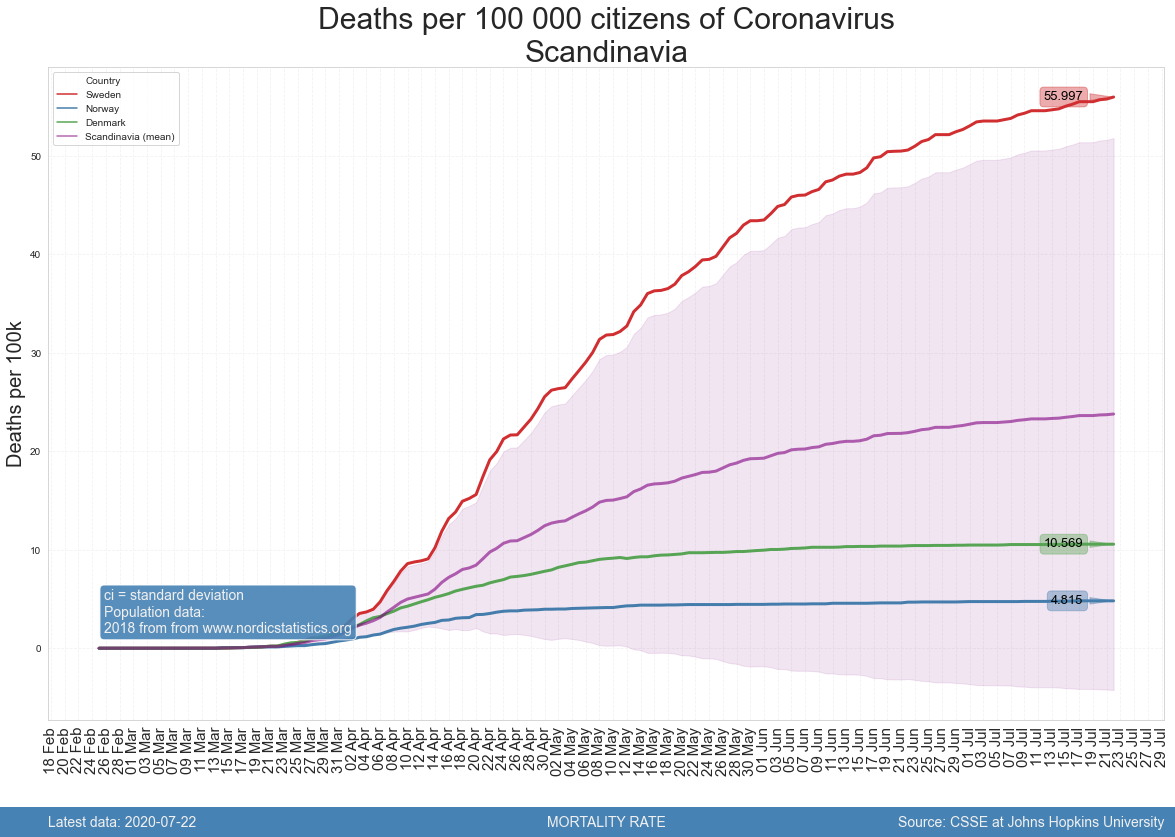

In [28]:
## Denna är också mortalitet men per 100k istället för per 1k

# Plot deaths per capita
fig, ax = plt.subplots(figsize=(20,12))
textstr = ""

# Plot per country
sns.lineplot(x=scandic_deaths_df[from_date:to_date].index, y="Deaths per 100k", data=scandic_deaths_df[from_date:to_date], palette=sns.color_palette("Set1", n_colors=num_countries, desat=.8), hue="Country")

# Plot mean if set to true
plot_mean = True
if plot_mean:
    # Plot Scandinavian mean
    sns.lineplot(x=scandic_deaths_df[from_date:to_date].index, y="Deaths per 100k", data=scandic_deaths_df[from_date:to_date], color="purple", label="Scandinavia (mean)", alpha=.6, ci="sd")

    # Format confidence interval
    ax.get_children()[0].set_alpha(.1)
    textstr = "ci = standard deviation\n"

# Set xticks location and format
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'));

# Create and display infotext
textstr = textstr + "Population data:\n2018 from from www.nordicstatistics.org"
props = dict(boxstyle='round', facecolor='steelblue', alpha=.9)
ax.text(0.05, 0.2, textstr, transform=ax.transAxes, fontsize=14,
        color="#f0f0f0", verticalalignment='top', bbox=props)

# Set title and axis parameters
plt.title("Deaths per 100 000 citizens of Coronavirus\nScandinavia", size=30)

#plt.xlabel("Date", size=20)
ax.xaxis.label.set_visible(False)
plt.ylabel("Deaths per 100k", size=20)

# Set the linewidth
for l in range(len(ax.lines)):
    ax.lines[l].set_linewidth(l_w)

# Format xticks
plt.xticks(rotation=90, size=15)

# Find last values
swe_last_dpc = scandic_deaths_df[scandic_deaths_df["Country"] == "Sweden"]["Deaths per 100k"][-1]
nor_last_dpc = scandic_deaths_df[scandic_deaths_df["Country"] == "Norway"]["Deaths per 100k"][-1]
den_last_dpc = scandic_deaths_df[scandic_deaths_df["Country"] == "Denmark"]["Deaths per 100k"][-1]

# Add annotations
ann_col = "salmon"
txt_col = "black"
alpha = .4
ax.annotate(str(round(swe_last_dpc,3)), xy=(scandic_deaths_df.index[-1], swe_last_dpc),  xycoords="data",
             xytext=(-30, 0), textcoords="offset points",
             size=13, ha="right", va="center",
             bbox=dict(boxstyle="round", alpha=alpha, color=ax.lines[0].get_color()),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=alpha, color=ax.lines[0].get_color()), color=txt_col)
ax.annotate(str(round(nor_last_dpc,3)), xy=(scandic_deaths_df.index[-1], nor_last_dpc),  xycoords="data",
             xytext=(-30, 0), textcoords="offset points",
             size=13, ha="right", va="center",
             bbox=dict(boxstyle="round", alpha=alpha, color=ax.lines[1].get_color()),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=alpha, color=ax.lines[1].get_color()), color=txt_col)
ax.annotate(str(round(den_last_dpc,3)), xy=(scandic_deaths_df.index[-1], den_last_dpc),  xycoords="data",
             xytext=(-30, 0), textcoords="offset points",
             size=13, ha="right", va="center",
             bbox=dict(boxstyle="round", alpha=alpha, color=ax.lines[2].get_color()),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=alpha, color=ax.lines[2].get_color()), color=txt_col)

# The signature bar
str1 = f"Latest data: {scandic_df.index[-1].date()}"
str2 = "Source: CSSE at Johns Hopkins University"
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]*2.5,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1])

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]*2.5,
                    s = "MORTALITY RATE", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]*2.5,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")



# Save as jpg and show plot
fname = str(datetime.date.today())+ "_scandinavia_dp100k" + ".png"
plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight")
plt.show()

In [29]:
# Number of people difference between Sweden and Denmark 
(swe_pop * (swe_last_dpc)/100000) - (swe_pop * (den_last_dpc)/100000)

4597.416080080398

In [30]:
# Number of people difference between Denmark and Sweden
(den_pop * (swe_last_dpc)/100000) - (den_pop * (den_last_dpc)/100000)

2626.274734141733

In [31]:
scandic_deaths_df["2020-03-31":]

,Country,Deaths,Deaths per capita,Deaths per 100k,Increase,Rolling7,Rolling30
Date,,,,,,,
2020-03-31,Sweden,180,0.017786,1.778614,34.0,20.571429,6.000000
2020-04-01,Sweden,239,0.023616,2.361604,59.0,25.285714,7.966667
2020-04-02,Sweden,308,0.030434,3.043405,69.0,33.000000,10.266667
2020-04-03,Sweden,358,0.035375,3.537465,50.0,36.142857,11.933333
2020-04-04,Sweden,373,0.036857,3.685683,15.0,38.285714,12.433333
...,...,...,...,...,...,...,...
2020-07-18,Denmark,611,0.105688,10.568758,0.0,0.285714,0.366667
2020-07-19,Denmark,611,0.105688,10.568758,0.0,0.285714,0.366667
2020-07-20,Denmark,611,0.105688,10.568758,0.0,0.142857,0.366667


In [32]:
sweden_mortality_2018 = pd.read_csv("mortalitet_sverige_2018.csv", sep=";", decimal=",")
#sweden_mortality_2018.rename({" Antal döda per 100 000": "Deaths per 100k"}, axis=1, inplace=True, errors="raise")


In [33]:
sweden_mortality_2018.columns = sweden_mortality_2018.columns.str.strip()
sweden_mortality_2018.head()

,DeathCause,DeadPer100k,Total,Age0-85+,BothGender,2018
0,Diagnos,2018,NaN,NaN,NaN,NaN
1,A00­A09 Infektionssjukdomar utgående från mag­...,"2,56",NaN,NaN,NaN,NaN
2,A15­A19 Tuberkulos,"0,15",NaN,NaN,NaN,NaN
3,A20­A28 Vissa djurburna bakteriesjukdomar,­­,NaN,NaN,NaN,NaN
4,A80­A89 Virussjukdomar i centrala nervsystemet,"0,35",NaN,NaN,NaN,NaN


In [34]:
sweden_mortality_2018.drop(["Total", "Age0-85+", "BothGender", "2018"], axis=1, inplace=True)

In [35]:
sweden_mortality_2018.replace("\xad\xad", np.nan, inplace=True)
sweden_mortality_2018.fillna(0, inplace=True)
sweden_mortality_2018["DeadPer100k"] = [str(x).replace(",", ".") for x in sweden_mortality_2018["DeadPer100k"]]

In [36]:
sweden_mortality_2018["DeadPer100k"] = pd.to_numeric(sweden_mortality_2018["DeadPer100k"])

In [37]:
sweden_mortality_2018.sort_values(by="DeadPer100k", axis=0, ascending=False, na_position="first").head(20)

,DeathCause,DeadPer100k
0,Diagnos,2018.00
34,I20­I25 Ischemiska hjärtsjukdomar (sjukdomar o...,105.93
21,"F00­F09 Organiska, inklusive symtomatiska, psy...",62.39
36,I60­I69 Sjukdomar i hjärnans kärl,55.76
40,J40­J47 Kroniska sjukdomar i nedre luftvägarna,32.34
39,J09­J18 Influensa och lunginflammation,25.34
33,I10­I15 Hypertonisjukdomar (högt blodtryck och...,24.96
17,E10­E14 Diabetes,21.19
37,"I70­I79 Sjukdomar i artärer, arterioler (småar...",16.48
95,X60­X84 Avsiktligt självdestruktiv handling (s...,12.46


In [38]:
scandic_deaths_df["logDeaths"] = scandic_deaths_df["Deaths"].apply(lambda x: np.log(x))
scandic_deaths_df.tail()

,Country,Deaths,Deaths per capita,Deaths per 100k,Increase,Rolling7,Rolling30,logDeaths
Date,,,,,,,,
2020-07-18,Denmark,611,0.105688,10.568758,0.0,0.285714,0.366667,6.415097
2020-07-19,Denmark,611,0.105688,10.568758,0.0,0.285714,0.366667,6.415097
2020-07-20,Denmark,611,0.105688,10.568758,0.0,0.142857,0.366667,6.415097
2020-07-21,Denmark,611,0.105688,10.568758,0.0,0.142857,0.366667,6.415097
2020-07-22,Denmark,611,0.105688,10.568758,0.0,0.142857,0.300000,6.415097


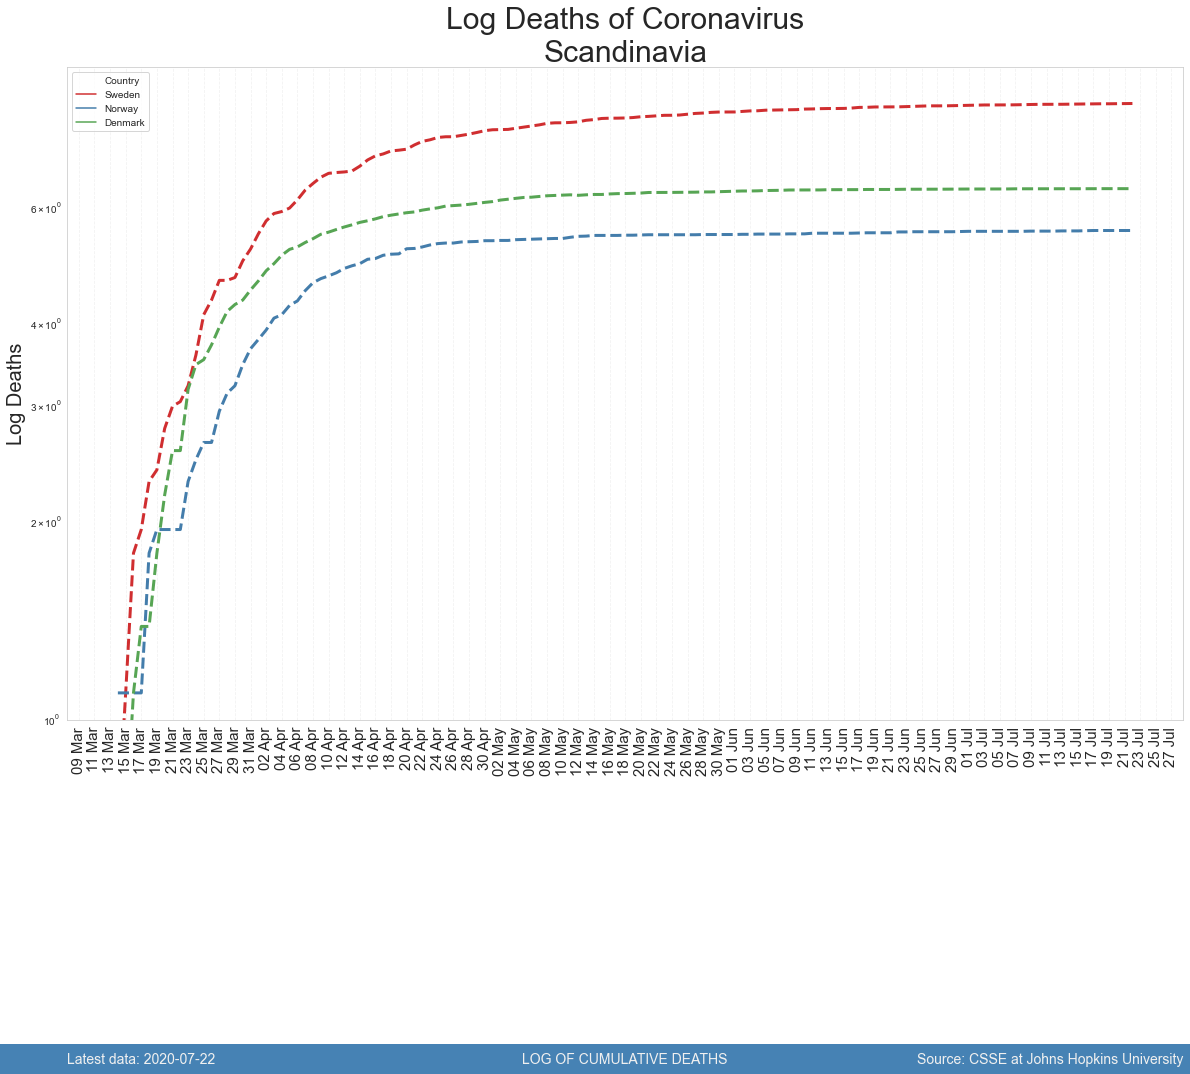

In [39]:
# Plot log of deaths
fig, ax = plt.subplots(figsize=(20,12))
textstr = ""
from_date = "2020-03-14"

# Plot per country
sns.lineplot(x=scandic_deaths_df[from_date:to_date].index, y=scandic_deaths_df[from_date:to_date]["Deaths"].apply(lambda x: np.log(x)), data=scandic_deaths_df[from_date:to_date], palette=sns.color_palette("Set1", n_colors=num_countries, desat=.8), hue="Country")

# Plot mean if set to true
plot_mean = False
if plot_mean:
    # Plot Scandinavian mean
    sns.lineplot(x=scandic_deaths_df[from_date:to_date].index, y="Deaths", data=scandic_deaths_df[from_date:to_date], color="purple", label="Scandinavia (mean)", alpha=.6, ci="sd")

    # Format confidence interval
    ax.get_children()[0].set_alpha(.1)
    
    # Create and display infotext
    textstr = "ci = standard deviation"
    props = dict(boxstyle='round', facecolor='steelblue', alpha=.9)
    ax.text(0.05, 0.2, textstr, transform=ax.transAxes, fontsize=14,
            color="#f0f0f0", verticalalignment='top', bbox=props)

# Set xticks location and format
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'));

# Set the linewidth
for l in range(len(ax.lines)):
    ax.lines[l].set_linewidth(l_w)
    ax.lines[l].set_linestyle("--")

# Set title and axis parameters
plt.title('Log Deaths of Coronavirus\nScandinavia', size=30)
ax.set(yscale="log")
ax.set_ylim(1e0,)
#plt.xlabel('Date', size=20)
ax.xaxis.label.set_visible(False)
plt.ylabel('Log Deaths', size=20)

# Format xticks
plt.xticks(rotation=90, size=15)

# The signature bar
str1 = f"Latest data: {scandic_df.index[-1].date()}"
str2 = "Source: CSSE at Johns Hopkins University"
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]*.3,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1])

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]*.3,
                    s = "LOG OF CUMULATIVE DEATHS", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]*.3,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")

# Save as jpg and show plot
fname = str(datetime.date.today()) + "_scandinavia_log_deaths" + ".png"
#plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight")
plt.show()

In [40]:
days_of_dead = scandic_deaths_df[scandic_deaths_df["Country"] == "Sweden"]["2020-03-11":]
print(len(days_of_dead))
print(days_of_dead["Deaths"][-1])
print("Genomsnitt:", days_of_dead["Deaths"][-1] / len(days_of_dead))

134
5667
Genomsnitt: 42.291044776119406


In [41]:
swe_death_stats = pd.read_csv("sweden_death_stats9.csv", sep=";", parse_dates=["Datum"], index_col=["Datum"])
swe_death_stats["Sum 2020"] = swe_death_stats["Deaths 2020"].cumsum()
swe_death_stats["Mean Sum"] = swe_death_stats["Mean Deaths 2015-2019"].cumsum()
swe_death_stats.drop(["Deaths 2020", "Mean Deaths 2015-2019"], axis=1, inplace=True)
#swe_death_stats.head()

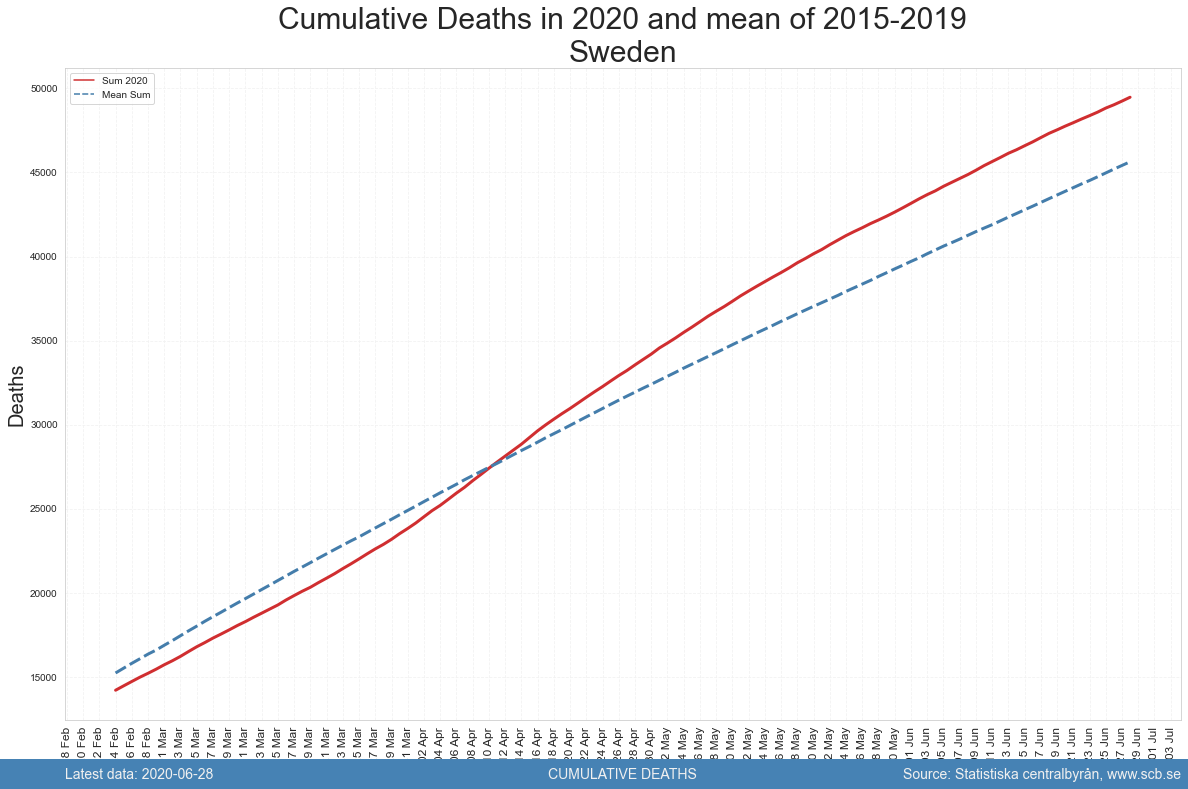

In [42]:
# Plot deaths in 2020 and mean deaths in Sweden per day
fig, ax = plt.subplots(figsize=(20,12))
textstr = ""

# Plot per country
sns.lineplot(data=swe_death_stats["2020-02-24":], palette=sns.color_palette("Set1", n_colors=2, desat=.8))

# Set xticks location and format
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'));

# Set the linewidth
for l in range(len(ax.lines)):
    ax.lines[l].set_linewidth(l_w)

# Set title and axis parameters
plt.title('Cumulative Deaths in 2020 and mean of 2015-2019\nSweden', size=30)


#plt.xlabel('Date', size=20)
ax.xaxis.label.set_visible(False)
plt.ylabel('Deaths', size=20)

# Format xticks
plt.xticks(rotation=90, size=12)

# The signature bar
str1 = f"Latest data: {swe_death_stats.index[-1].date()}"
str2 = "Source: Statistiska centralbyrån, www.scb.se"
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]-3500,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1])

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]-3500,
                    s = "CUMULATIVE DEATHS", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]-3500,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")

# Save as jpg and show plot
fname = str(datetime.date.today()) + "_sweden_death_stats" + ".png"
#plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight")
plt.show()

In [43]:
swe_death_stats.tail()

,Sum 2020,Mean Sum
Datum,,
2020-06-24,48580,44739
2020-06-25,48820,44966
2020-06-26,49015,45192
2020-06-27,49235,45411
2020-06-28,49465,45629


In [44]:
swe_death_compare = pd.read_csv("swe_death_compare.csv", sep=";", parse_dates=["Datum"], index_col=["Datum"])

In [45]:
swe_death_compare.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179 entries, 2020-01-01 to 2020-06-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2015    179 non-null    int64
 1   2016    179 non-null    int64
 2   2017    179 non-null    int64
 3   2018    179 non-null    int64
 4   2019    179 non-null    int64
 5   2020    179 non-null    int64
dtypes: int64(6)
memory usage: 9.8 KB


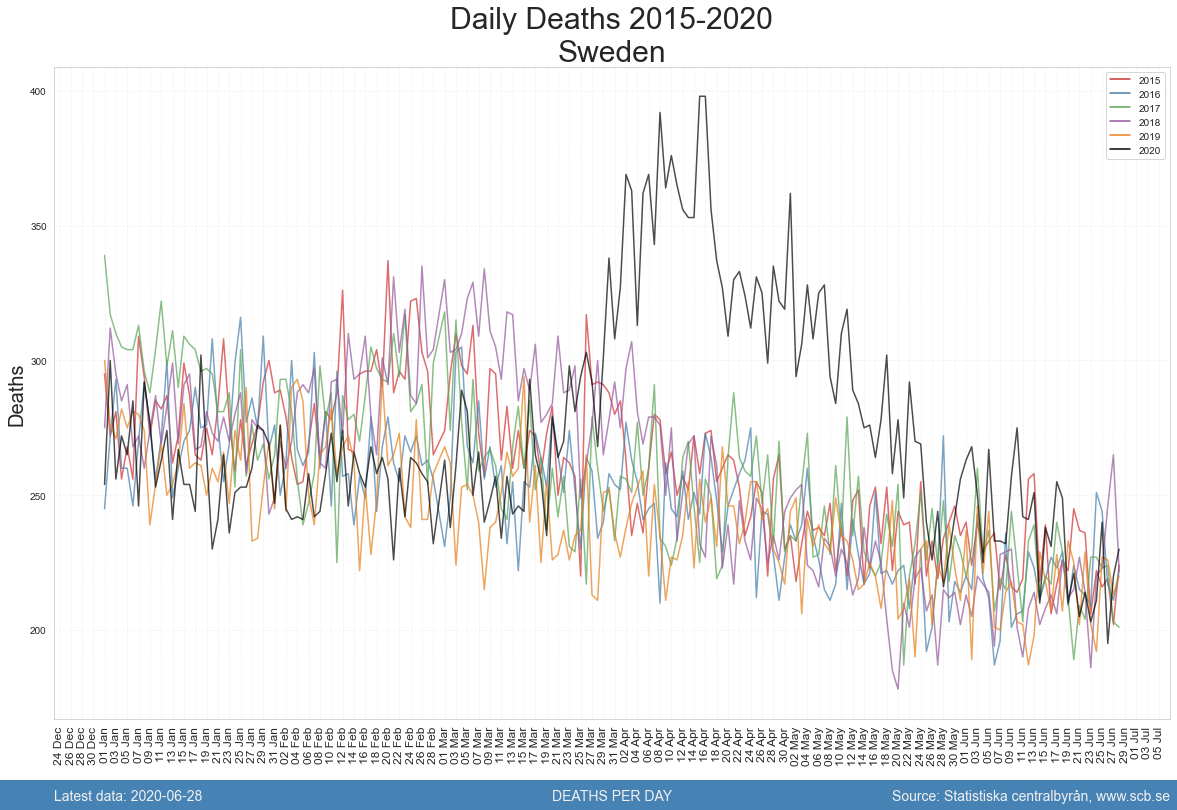

In [46]:
# Plot deaths in 2020 and mean deaths in Sweden per day
fig, ax = plt.subplots(figsize=(20,12))
textstr = ""

# Plot per country
sns.lineplot(data=swe_death_compare, palette=sns.color_palette("Set1", n_colors=6, desat=.8), alpha=.7)

# Set xticks location and format
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
##ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'));

# Set the linewidth
for l in range(len(ax.lines)):
    ax.lines[l].set_linewidth(l_w/2)
    ax.lines[l].set_linestyle("-")
ax.lines[5].set_color("black")

# Fix legend
handles, labels = ax.get_legend_handles_labels()
handles[5].set_color("black")
ax.legend(handles=handles, labels=labels)    

# Set title and axis parameters
plt.title('Daily Deaths 2015-2020\nSweden', size=30)


#plt.xlabel('Date', size=20)
ax.xaxis.label.set_visible(False)
plt.ylabel('Deaths', size=20)

# Format xticks
plt.xticks(rotation=90, size=12)

# The signature bar
str1 = f"Latest data: {swe_death_stats.index[-1].date()}"
str2 = "Source: Statistiska centralbyrån, www.scb.se"
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]-30,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1])

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]-30,
                    s = "DEATHS PER DAY", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]-30,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")

# Save as jpg and show plot
fname = str(datetime.date.today()) + "_sweden_death_compare" + ".png"
#plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight")
plt.show()

In [47]:
#scandic_deaths_df["2020-03-20":].head(20)

In [48]:
"""
# Plot daily new deaths
fig, ax = plt.subplots(figsize=(20,12))

#x_dates = scandic_deaths_df[from_date:].index.strftime('%d %b')

# Plot per country
sns.barplot(x=scandic_deaths_df[from_date:].index, y="Increase", data=scandic_deaths_df[from_date:], palette=sns.color_palette("Set1", n_colors=num_countries, desat=.8), hue="Country")

# Set xticks location and format
x_dates = scandic_deaths_df[from_date:].index.strftime('%d %b').unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='center')
#ax2.set_xticklabels(labels=x_dates, rotation=45, ha='center')

# Set title and axis parameters
plt.title('Daily deaths of Coronavirus\nScandinavia', size=30)

ax.xaxis.label.set_visible(False)
plt.ylabel('Deaths', size=20)

# Format xticks
plt.xticks(rotation=90, size=15)

# The signature bar
str1 = f"Latest data: {scandic_df.index[-1].date()}"
str2 = "Source: CSSE at Johns Hopkins University"
print(ax.get_ylim())
print(ax.get_xlim())
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]-ax.get_ylim()[1]/8,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1]*60)

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]-ax.get_ylim()[1]/8,
                    s = "DAILY DEATHS", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]-ax.get_ylim()[1]/8,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")


# Save as jpg and show plot
fname = str(datetime.date.today()) + "_scandinavia_daily_deaths" + ".png"
plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight")
plt.show()
"""
print()

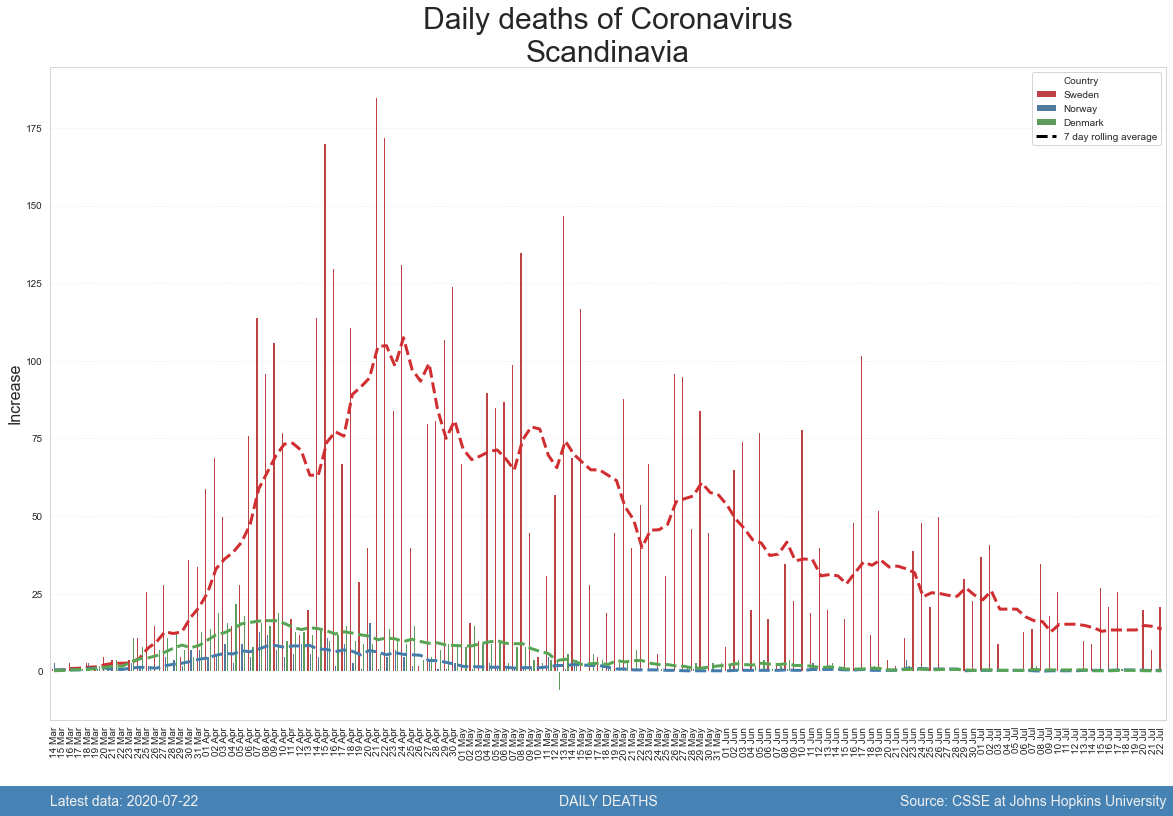

In [49]:
# Plot daily new deaths and rolling average
fig= plt.figure(figsize=(20,12))

# Create dates for x-axis
x_dates = scandic_deaths_df[from_date:].index.strftime('%d %b') #.unique()

# Add subplot
ax = fig.add_subplot(111)
#ax3 = fig.add_subplot(111)

# Plot per country
ax = sns.lineplot(x=x_dates, y="Rolling7", data=scandic_deaths_df[from_date:], sort=False, palette=sns.color_palette("Set1", n_colors=3, desat=.8), hue="Country", linestyle="--")
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Increase', fontsize=16)

#ax3 = sns.lineplot(x=x_dates, y="Rolling30", data=scandic_deaths_df[from_date:], sort=False, palette=sns.color_palette("Set1", n_colors=3, desat=.8), hue="Country", linestyle="-.")

ax2 = sns.barplot(x=x_dates, y="Increase", data=scandic_deaths_df[from_date:], palette=sns.color_palette("Set1", n_colors=3, desat=.8), hue="Country")

# Set the linestyle
for l in range(len(ax.lines)):
    ax.lines[l].set_linestyle("--")
    ax.lines[l].set_linewidth(l_w)
    

# Fix legend
handles, labels = ax.get_legend_handles_labels()
handles.pop(1)
handles.pop(1)
handles.append(handles[1])
handles.pop(1)
labels = labels[4:]
labels.insert(0, "Country")
labels.append("7 day rolling average")
handles[4].set_color("black")
ax.legend(handles=handles, labels=labels)


# Set xticks location and format
ax.set_xticklabels(labels=x_dates, rotation=90, ha='center', size=10)
#ax.xaxis.set_major_locator(MultipleLocator())

# Set title and axis parameters
plt.title('Daily deaths of Coronavirus\nScandinavia', size=30)

ax.xaxis.label.set_visible(False)

# The signature bar
str1 = f"Latest data: {scandic_df.index[-1].date()}"
str2 = "Source: CSSE at Johns Hopkins University"
#print(ax.get_ylim())
#print(ax.get_xlim())
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]-ax.get_ylim()[1]/7,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1]*60)

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]-ax.get_ylim()[1]/7,
                    s = "DAILY DEATHS", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]-ax.get_ylim()[1]/7,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")


# Save as jpg and show plot
fname = str(datetime.date.today()) + "_scandinavia_daily_deaths" + ".png"
plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight")
plt.show()